# Logistic Regression
You should build a machine learning pipeline using a logistic regression model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a logistic regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

#Data

In [1]:
import pandas as pd
import sklearn.model_selection
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing
import sklearn.metrics
from sklearn.neighbors import KNeighborsRegressor

##Data Collection

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv")
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(4000, 786)

In [7]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

##Data Exploration

<Axes: >

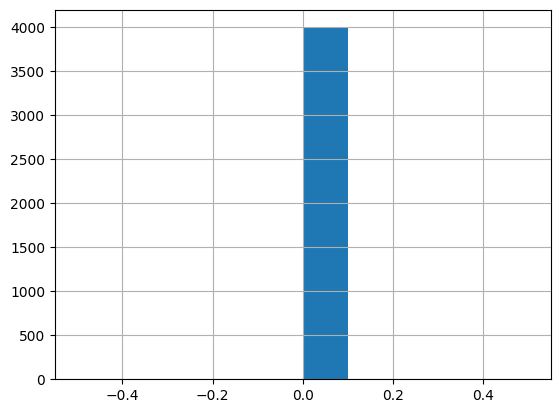

In [5]:
df['pixel61'].hist()

<Axes: >

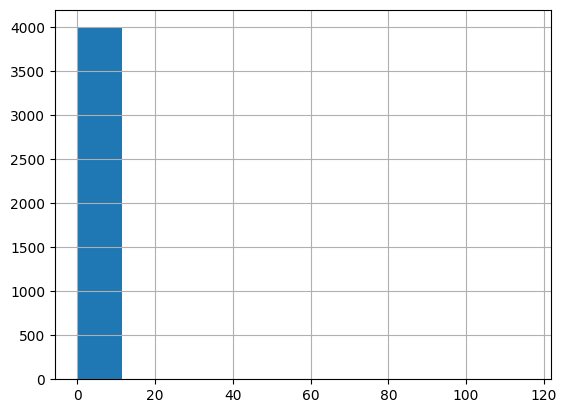

In [6]:
df['pixel13'].hist()

<Axes: >

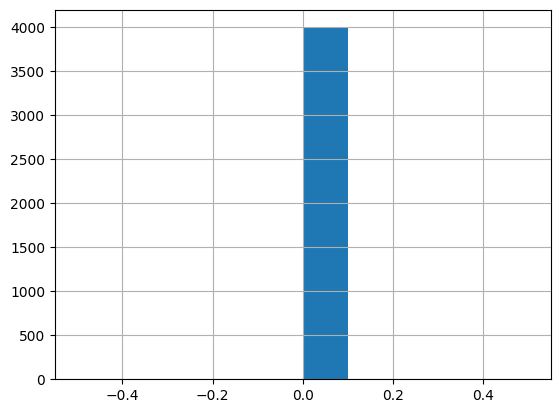

In [7]:
df['pixel753'].hist()

From the above graphs we know that most of the outer columns have all implicit values.

##Data Preprocessing

Main objective of the preprocessing is to convert those implicit values to explicit values and then use dropna() function to drop all those columns.

In [8]:
df_train = df_train.replace([0], pd.NA)
df_test = df_test.replace([0], pd.NA)

df_train = df_train.dropna(axis = 'columns', how='all')
df_test = df_test.dropna(axis = 'columns', how='all')

In [15]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [10]:
df_train.shape

(3000, 646)

In [11]:
df_test.shape

(1000, 607)

In [10]:
X_train = df_train.drop(columns=['class'], axis = 1)
Y_train = df_train['class']
X_test = df_test.drop(columns=['class'])
Y_test = df_test['class']

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [13]:
X_train

,id,pixel13,pixel14,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,...,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778
2264,32229,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1629,4409,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1660,25506,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2197,67781,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2855,22508,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,54767,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3137,14537,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2698,34171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3364,48622,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Feature Engineering

In [14]:
#pipe = make_pipeline(sklearn.preprocessing.StandardScaler(), LogisticRegression())
#pipe.fit(X_train, Y_train)
#score = pipe.score(X_test, Y_test)
#score
#0.883

In [11]:
numerical_attributes = X_train.select_dtypes(include = ["int64", "float64"]).columns
ct = sklearn.compose.ColumnTransformer(
   [
         ("standar_scaler", sklearn.preprocessing.StandardScaler(), numerical_attributes),
        ],
 remainder = "passthrough",
    )
ct.fit(X_train)
x_train = ct.transform(X_train)
x_test = ct.transform(X_test)

There won't be any needing to do Feature engineering as the values are binary.

#Model

##Model Training

In [16]:
model = LogisticRegression(solver="saga",max_iter=10000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, solver='saga')

##Model Evaluation

In [17]:
y_pred = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(Y_test, y_pred)
accuracy

0.905